# Simple Customer Acquisition Model

This notebook illustrates how to use a notebook to mix text, images, plots and interactive interfaces. It uses a simple customer acquisition model as an illustration and is based on a [post](https://www.transentis.com/an-example-to-illustrate-the-business-prototyping-methodology) from our blog.

## The Challenge

Most business prototyping activities start with a challenge, so let’s suppose you are given the following challenge by your CEO:

“We are launching a new service in six months.
My feeling is that in the past our sales figures have been too low given our spending on advertising.
Please take some time to understand how we have approached service advertising in the past and see whether you can come up with some ideas to improve the service adoption rate in the future.”

![The Challenge](images/challenge.svg)

## Use Simple Sketches To Capture Initial Ideas And Define The Scope

So, in this case, we have a simple sketch showing the kinds of marketing that has is going on or could be going on. We have got classical outbound marketing, we have got inbound marketing, we have got word-of-mouth marketing and referral marketing and during such a discussion, you may well find out that actually what you have been doing so far, typically, is perhaps outbound marketing and you have completely neglected other strategies such as referral strategies or inbound marketing.

![Use Simple Sketches](images/simple_sketches.svg)

While exploring your challenge you most likely come up with quite a few potential ideas. You always need to be clear about the scope of your assignment – which ideas should you look at now, which can you put aside and come back to later.


![Define The Scope](images/scope.svg)

In our case it probably doesn’t make sense to look at the inbound marketing strategy for now, because it will take longer to set up than the six month time frame the CEO was speaking about.

So let’s put that idea on the back burner for now and just concentrate on referral marketing.

See, even really simple diagrams such as this one are useful in defining the scope of an assignment!

## Capture Key Interactions

Once you have understood the key concepts, the next thing to do in prototyping is to a build a more detailed model of how the system you are trying to change works. Depending on the kind of challenge, quite a number of different kinds of modeling techniques could be useful here.

In our concrete case, we want to understand the factors that influence the service adoption rate and potential benefits and costs associated with any changes we make to the current approach.

We are dealing with a dynamic problem, because we would like the service adoption rate to change and increase over time – whenever you are confronted with dynamic complexity at a strategic level, causal loop diagrams are good weapon to choose.

They are useful to capture the key interactions in a system and to capture the dynamics behavior of a system. We will cover causal loop diagrams in detail in the next chapter of this course.

![Key Interactions](images/key_interactions.svg)

Let’s take a brief look at what this little model is telling us: On the left hand side we have a loop that shows how we acquire customers via advertising – the more money we spend on advertising, the more people we will reach, and some of these people will become customers of our service. This is a loop, because all marketing is constrained by market saturation – if our service is really successful and we gain more and more customers, advertising will become less effective because a lot of our adverts will reach people who already are our customers.

In the middle of the diagram, we can see the new referral marketing idea we want to experiment with – the idea is to get people who have already subscribed to our service to refer new customers; we give them a – yet to be determined – amount of free service time for every referral. This is a positive loop, because the more customers we have the more referrals they ought to generate, thus – if the referral scheme is successful – increasing our customer base very rapidly.

Needless to say we are interested not only in the benefits of such a referral schema but also in its cost. On the right side of the diagram you can see all the factors affecting the profitability of the service. We assume there is an operative margin associated with each subscription and we use this to recuperate the initial investment and pay for marketing activities.

So while this is a small model at a very abstract level, it actually captures all the essential elements. We probably could use this basic model quite well in a real life situation – we would probably end up making it slightly more detailed to account for different advertising channels and there would be a number of special effects in service adoption rates we would have to account for … but it certainly would be a good starting point.

## Get Quantitative

Now that we have our basic model, we need to get quantitative and assign values to each of the factors in the model.

There aren’t that many numbers we have to define – the key ones here are that we are targeting a market of 6 Mio potential customers. Our customers pay €10 per month for using the service and there is an operative margin of 50% associated with the service. This margin includes the running costs of the service, but not the initial investment of € 1 Mio and not the marketing costs.

![Get Quantitative](images/get_quantitative.svg)

What is also important is that 0.1% of our adverts have been successful in the past, that is every 1000th person who sees our ad actually adopts the service.

## Experiment With The Model

Once we have quantified the model, we can build an interactive simulation to experiment with different strategies. 

Be sure to test the base case: this is our “old” marketing scheme without referrals. The base case shows that we reach break even after around 24 months.

You can also play with the referral program to see what effect it could have on profitability, depending on your assumptions of how well the referral program is adopted. For instance, if we are conservative and assume that 1% of our customers will adopt the program and they have to bring one referral per free month of service, then we would make slightly more profit than in the base case.

In [1]:
## Load the BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

In [2]:
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets


from BPTK_Py.visualizations import SimpleDashboard

dashboard = SimpleDashboard(bptk, scenario_manager="smCustomerAcquisition", scenario="interactiveScenario")

advertising_success=widgets.FloatSlider(
    value=0.1,
    min=0,
    max=10,
    step=0.01,
    continuous_update=False,
    description='Advertising Success %',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='40%')
    )

referral_program_adoption=widgets.FloatSlider(
    value=10,
    min=0,
    max=30,
    step=1,
    continuous_update=False,
    description='Referral Program Success %',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='40%')
    )

referrals=widgets.FloatSlider(
    value=0,
    min=0,
    max=11,
    step=1,
    continuous_update=False,
    description='Referrals',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='40%')
    )

referral_free_months=widgets.FloatSlider(
    value=3,
    min=0,
    max=11,
    step=1,
    continuous_update=False,
    description='Referral Free Months',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='40%')
)

dashboard.add_widget(advertising_success,'advertisingSuccess%')
dashboard.add_widget(referral_program_adoption,'referralProgramAdoption%')
dashboard.add_widget(referrals,'referrals')
dashboard.add_widget(referral_free_months,'referralFreeMonths')
    
plot_customers = dashboard.add_plot(
    equations=['customers'],
    names=["Customers"],
    title="Customers"
)

    
plot_profit = dashboard.add_plot(
    equations=['profit'],
    names=["Profit"],
    title="Profit"
)
    
graph_tabs = widgets.Tab(children = [plot_customers, plot_profit],titles=['Customers','Profit'])

controls = widgets.VBox([advertising_success, referral_program_adoption,referrals,referral_free_months])


display(graph_tabs)
display(controls)

dashboard.start()


## Identify Critical Factors

The next step after experimenting with the model for a bit is to identify the critical factors that are relevant to making a decision.

By definition, a critical factor is one that will have both a high impact on your results and is fraught with uncertainty – you simply don’t know which value these factors will really have.

![Critical Factors](images/critical_factors.svg)

In this example, there are two such factors – we don’t know how successful our advertising campaign is going to be (though we do have a lot of experience from previous campaigns here) and we have no idea how well the referral program will be adopted.

## Define Plausible Scenarios

What we do in such a case is take a look at a realistic range for each of these values and build scenarios from them.

![Critical Factors](images/scenarios.svg)

In this example we end up with four scenarios:

* The “Here We Go” scenario that assumes that 10% of our customers adopt the referral program, getting three months of free service for three referrals; in this scenario, the advertising campaign is also successful, at the same level of 0.1% we saw in previous campaigns.
* On the other hand, we also have a “Service Flop” scenario, which assumes that only 1% of customers adopt the referral program and the advertising campaign also is much less successful at 0.01%.
* The “Rethink Advertising” and the “Refer someone, please!” are mixed scenarios.

What we learn from these scenarios is that unless the service flops completely, referral marketing could actually be a good approach – even in the “Refer someone, please!” scenario we improve customer base and thus our profit.

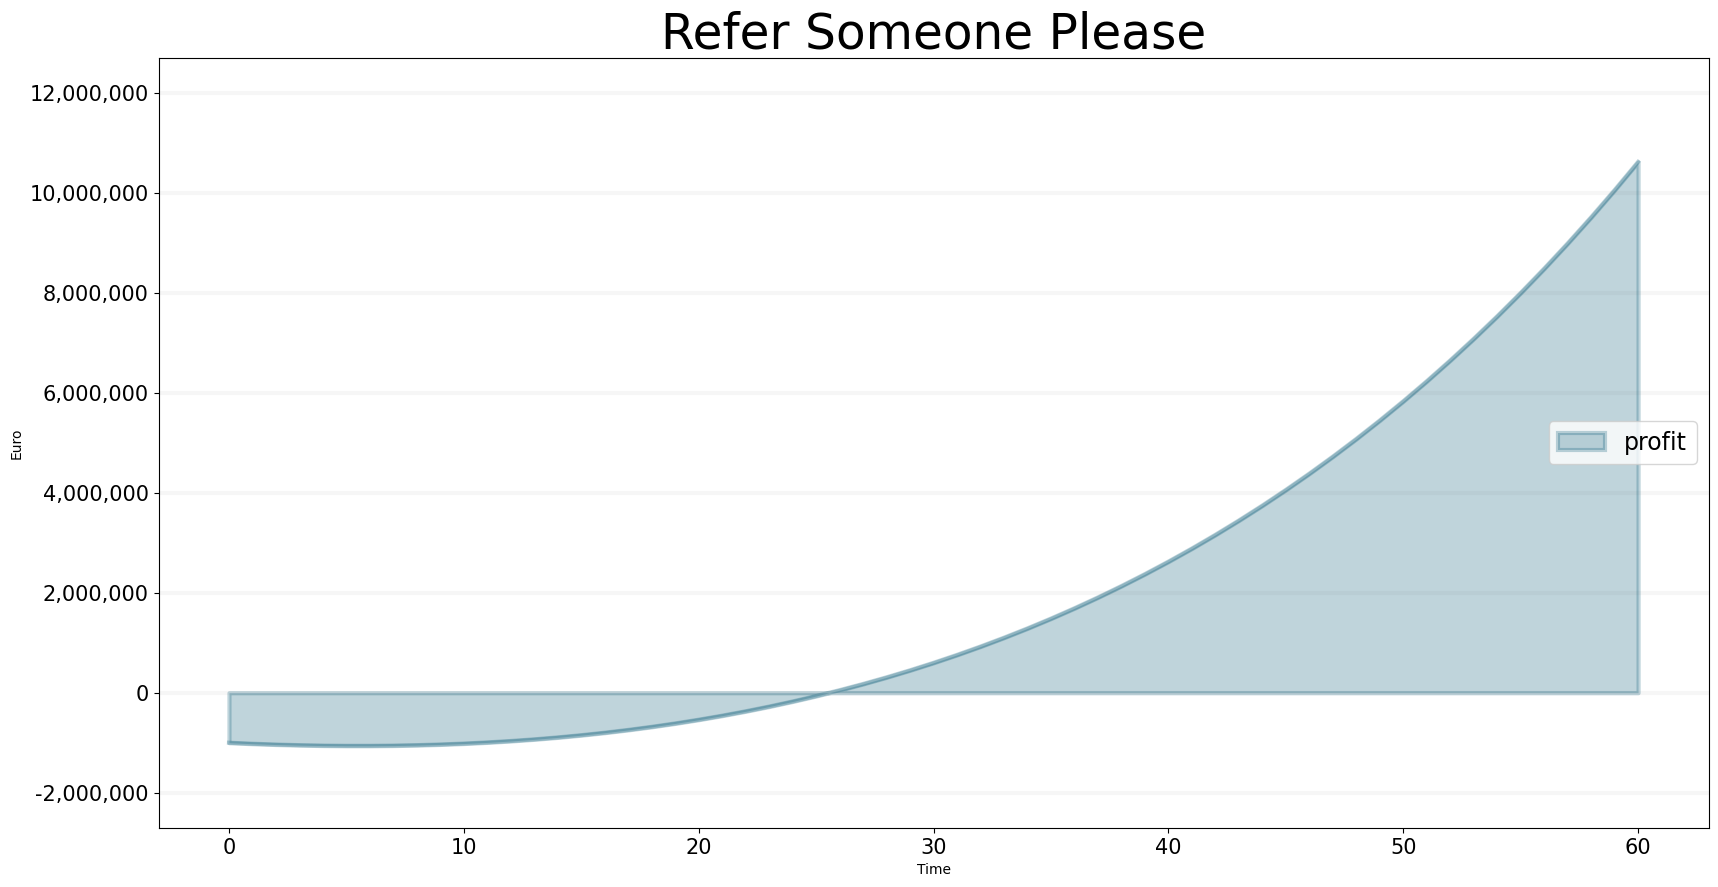

In [3]:
bptk.plot_scenarios(
            scenario_managers=["smCustomerAcquisition"],
            scenarios=["referSomeonePlease"], 
            equations=['profit'],
            title="Refer Someone Please",
            freq="M",
            x_label="Time",
            y_label="Euro"
            )

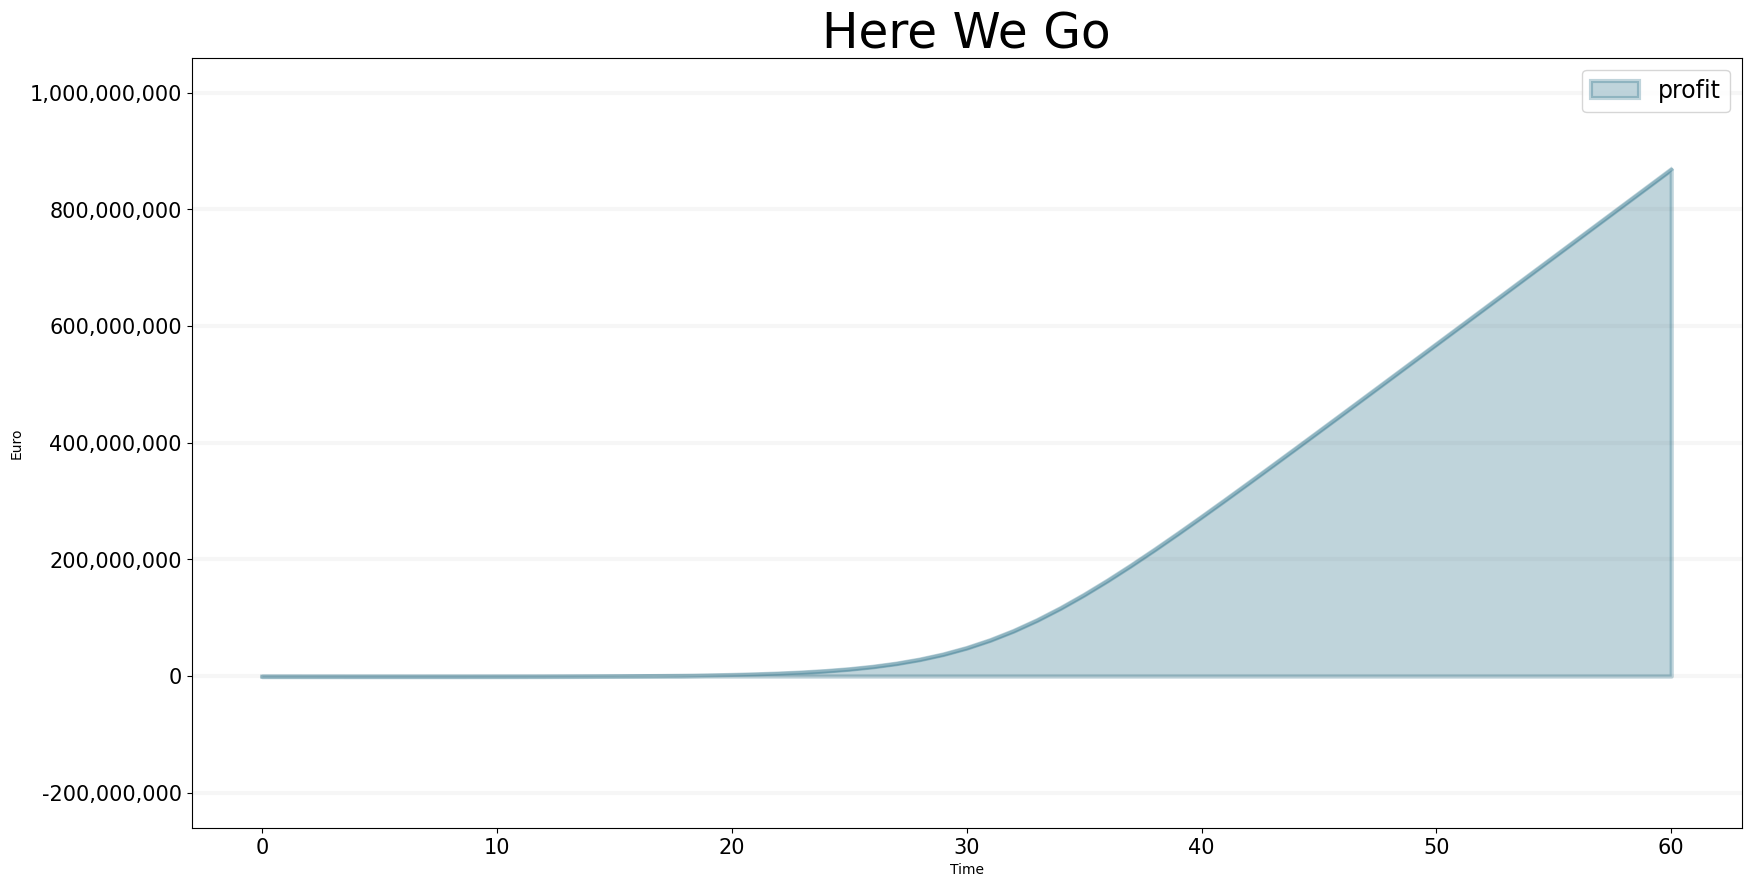

In [4]:
bptk.plot_scenarios(
            scenario_managers=["smCustomerAcquisition"],
            scenarios=["hereWeGo"], 
            equations=['profit'],
            title="Here We Go",
            freq="M",
            x_label="Time",
            y_label="Euro"
            )

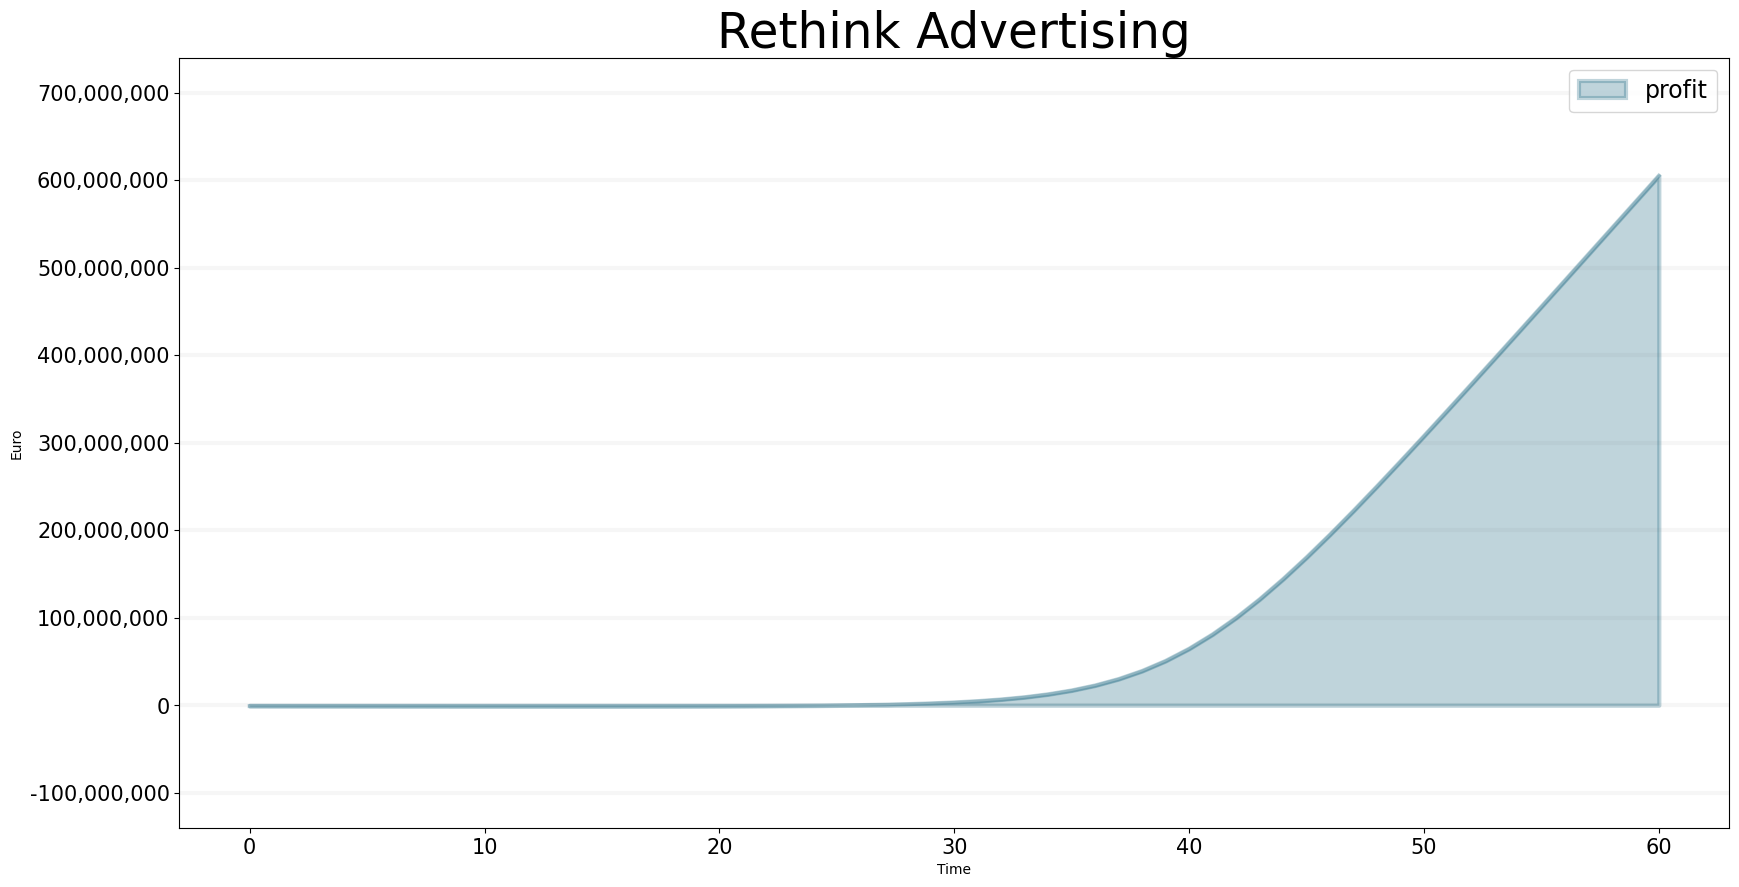

In [5]:
bptk.plot_scenarios(
            scenario_managers=["smCustomerAcquisition"],
            scenarios=["rethinkAdvertising"], 
            equations=['profit'],
            title="Rethink Advertising",
            freq="M",
            x_label="Time",
            y_label="Euro"
            )

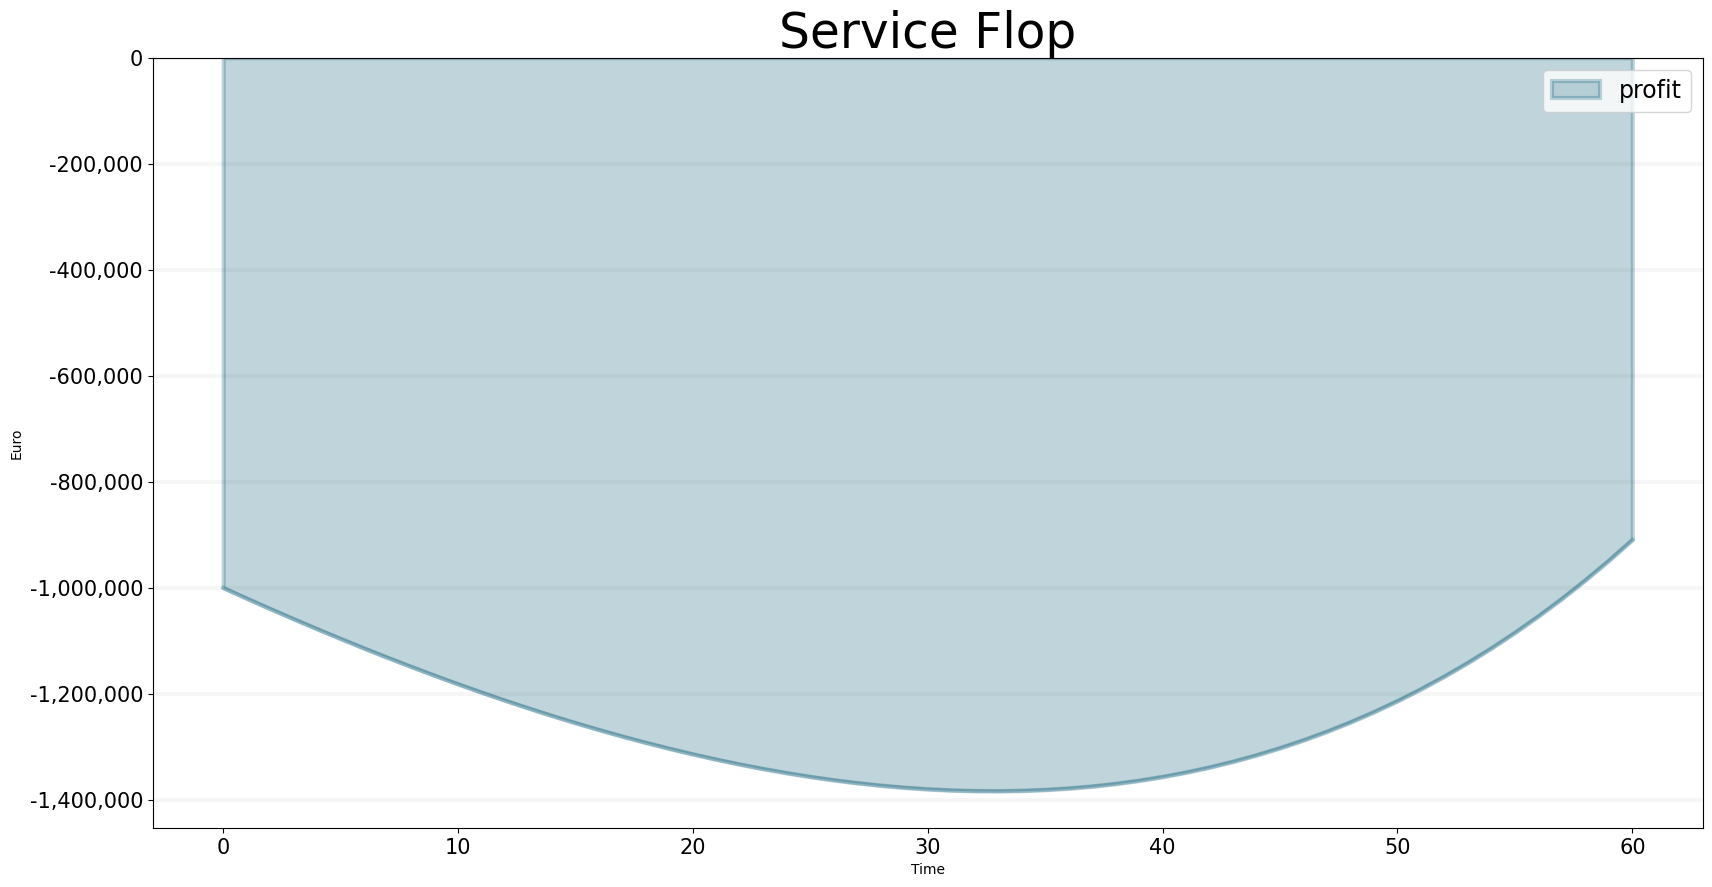

In [6]:
bptk.plot_scenarios(
            scenario_managers=["smCustomerAcquisition"],
            scenarios=["serviceFlop"], 
            equations=['profit'],
            title="Service Flop",
            freq="M",
            x_label="Time",
            y_label="Euro"
            )

## Analyze Opportunities and Risk

Before we move on we should of course also look at opportunities and risks – it actually turns out that what is an opportunity also carries some risk.


![Analyze Opportunities and Risk](images/opportunities_risks.svg)


Let’s take a look at a scenario which I have called “Boom But Bust”: we offer three months of free service for every referral. The program is adopted by a staggering 30% of our customers. In the long run, our customer base and our profit go through the roof.

But look at what happens in the short run – we end up with a cash shortfall of around €24.5 Mio. after two years. That could be very difficult to finance.

## Build A Management Dashboard

Once you have finalised your simulation, you can build a fancy management dashboard to share with a wider audience.

Here is a dashboard we created using PowerBI, using data exported from the simulation model:

In [7]:
from IPython.display import IFrame       
IFrame('https://app.powerbi.com/view?r=eyJrIjoiNDFlMTA2ZGItYmFkOC00Mjg3LTljODYtYzRkYzY2YmFmM2E4IiwidCI6ImZjNWRmZDc1LTQ1NzktNGQ3MC05YTE3LTk0MmQ0OWMwMTc2ZiIsImMiOjl9', width=933, height=700)

## Make A Decision On How To Move Forward

Now that we have analyzed new marketing strategies, we are ready to make a recommendation to the CEO – adopt a referral program, because unless the service flops completely, you can’t really loose.

If the service does flop, we need to pull the plug very quickly.

If the referral program takes off, our customer service base could expand very quickly. We ought to prepare for that to ensure our service and organization scales appropriately.

![Decision](images/decision.svg)
